/var/folders/r1/gtmyxpws2836627xn7_9c5380000gn/T/ipykernel_9517/2662605708.py:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


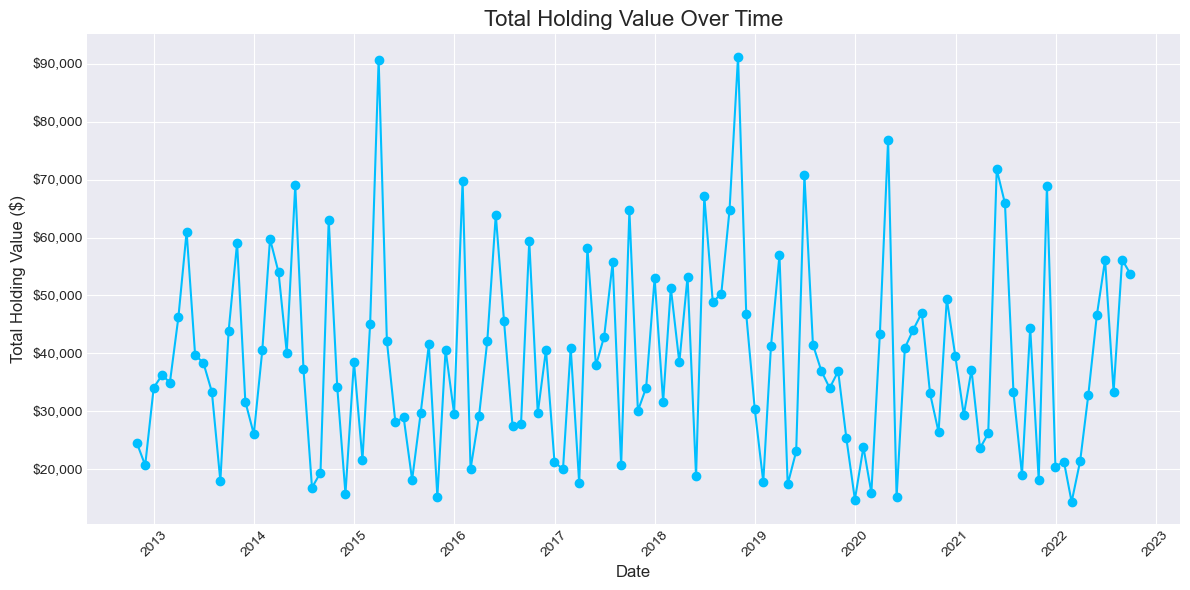

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Sample Data Generation
np.random.seed(0)
periods = pd.date_range(start="2012-10-01", periods=120, freq='M')
stocks = ['Stock1', 'Stock2']

data = {
    'Period': np.repeat(periods, len(stocks)),
    'Stock': np.tile(stocks, len(periods)),
    'Dividend': np.random.uniform(1, 3, len(periods) * len(stocks)),
    'Holding Units': np.random.uniform(10, 100, len(periods) * len(stocks)),
    'End Period Price': np.random.uniform(100, 500, len(periods) * len(stocks)),
    'Cash': np.random.uniform(1000, 5000, len(periods) * len(stocks))
}

df = pd.DataFrame(data)
df['Holding Value'] = df['Holding Units'] * df['End Period Price']
df['Total Holding'] = df['Cash'] + df['Dividend'] + df['Holding Value']

# Aggregating data for plotting
plot_data = df.groupby('Period').agg({'Total Holding': 'sum'}).reset_index()

# Plotting
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(plot_data['Period'], plot_data['Total Holding'], marker='o', linestyle='-', color='deepskyblue')

# Formatting
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x):,}'))
ax.set_title('Total Holding Value Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Total Holding Value ($)', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()

# Save to a file
#plt.savefig('/mnt/data/total_holding_value_over_time.png')
plt.show()


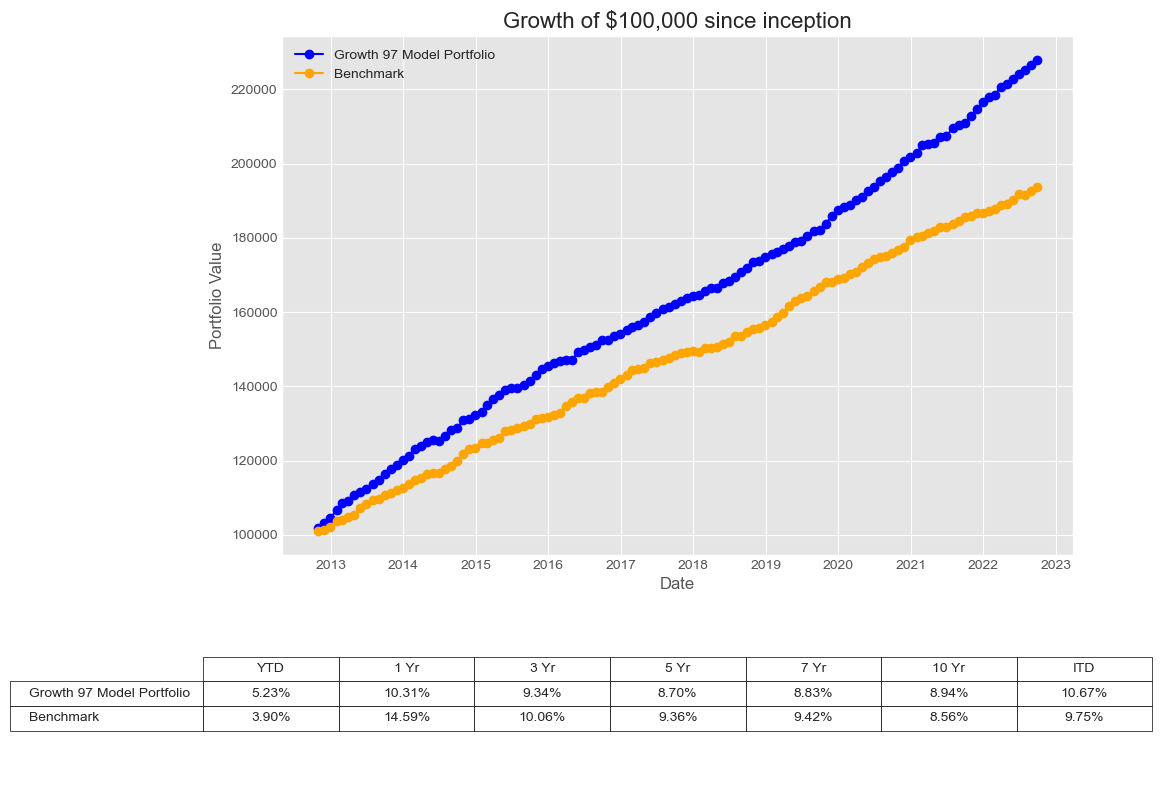

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec

# Data generation
np.random.seed(0)
dates = pd.date_range(start="2012-10-01", periods=120, freq='M')
portfolio_performance = 100000 * (1 + np.random.normal(0.01, 0.005, len(dates)).cumsum())
benchmark_performance = 100000 * (1 + np.random.normal(0.008, 0.005, len(dates)).cumsum())

df = pd.DataFrame({
    'Date': dates,
    'Growth 97 Model Portfolio': portfolio_performance,
    'Benchmark': benchmark_performance
})

# Plotting
plt.style.use('ggplot')
fig = plt.figure(tight_layout=True, figsize=(12, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

ax1 = fig.add_subplot(gs[0])
ax1.plot(df['Date'], df['Growth 97 Model Portfolio'], label='Growth 97 Model Portfolio', color='blue', marker='o')
ax1.plot(df['Date'], df['Benchmark'], label='Benchmark', color='orange', marker='o')
ax1.set_title('Growth of $100,000 since inception', fontsize=16)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Portfolio Value', fontsize=12)
ax1.legend()

# Adding a performance table
performance_data = {
    'YTD': ['5.23%', '3.90%'],
    '1 Yr': ['10.31%', '14.59%'],
    '3 Yr': ['9.34%', '10.06%'],
    '5 Yr': ['8.70%', '9.36%'],
    '7 Yr': ['8.83%', '9.42%'],
    '10 Yr': ['8.94%', '8.56%'],
    'ITD': ['10.67%', '9.75%']
}
performance_df = pd.DataFrame(performance_data, index=['Growth 97 Model Portfolio', 'Benchmark'])

ax2 = fig.add_subplot(gs[1])
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=performance_df.values, colLabels=performance_df.columns, rowLabels=performance_df.index, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Save to a file
#plt.savefig('/mnt/data/advanced_portfolio_growth.png')
plt.show()


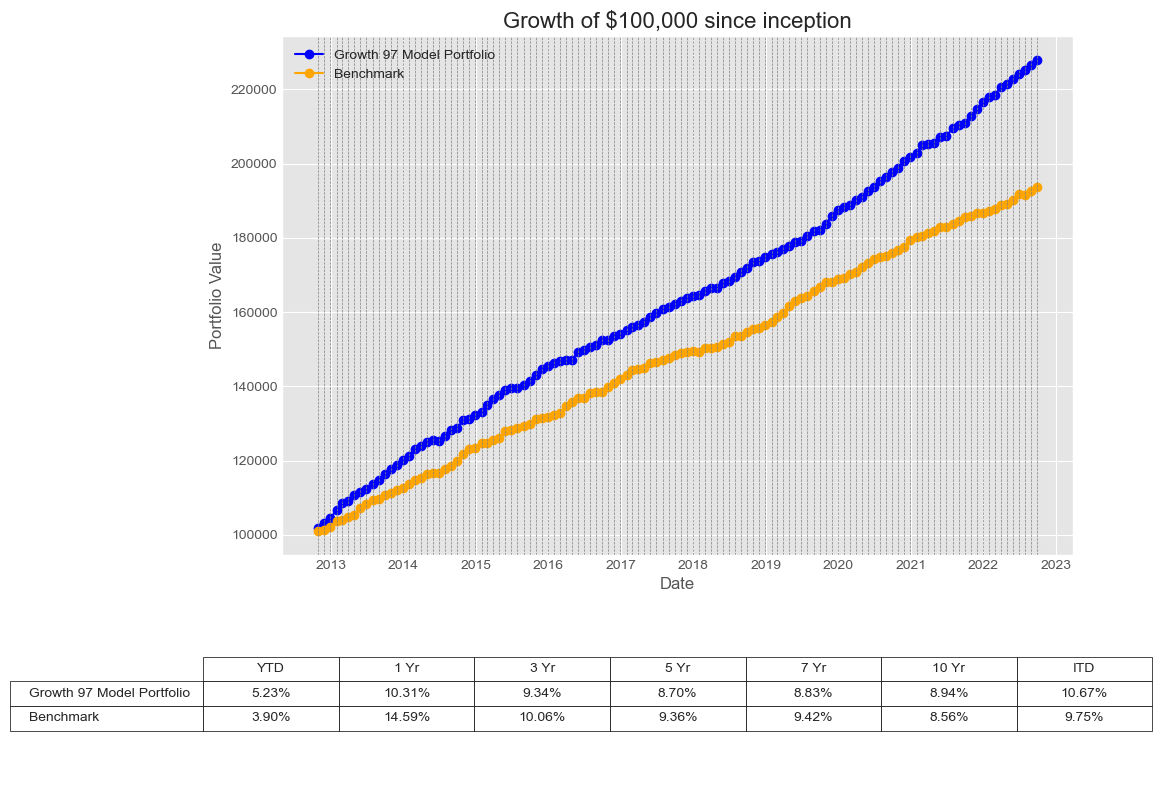

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

# Data generation
np.random.seed(0)
dates = pd.date_range(start="2012-10-01", periods=120, freq='M')
portfolio_performance = 100000 * (1 + np.random.normal(0.01, 0.005, len(dates)).cumsum())
benchmark_performance = 100000 * (1 + np.random.normal(0.008, 0.005, len(dates)).cumsum())

df = pd.DataFrame({
    'Date': dates,
    'Growth 97 Model Portfolio': portfolio_performance,
    'Benchmark': benchmark_performance
})

# Plotting
plt.style.use('ggplot')
fig = plt.figure(tight_layout=True, figsize=(12, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

ax1 = fig.add_subplot(gs[0])
ax1.plot(df['Date'], df['Growth 97 Model Portfolio'], label='Growth 97 Model Portfolio', color='blue', marker='o')
ax1.plot(df['Date'], df['Benchmark'], label='Benchmark', color='orange', marker='o')
ax1.set_title('Growth of $100,000 since inception', fontsize=16)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Portfolio Value', fontsize=12)
ax1.legend()

# Formatting vertical lines and x-axis for better monthly visibility
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
for date in dates:
    ax1.axvline(x=date, color='gray', linestyle='--', linewidth=0.5)

# Adding a performance table
performance_data = {
    'YTD': ['5.23%', '3.90%'],
    '1 Yr': ['10.31%', '14.59%'],
    '3 Yr': ['9.34%', '10.06%'],
    '5 Yr': ['8.70%', '9.36%'],
    '7 Yr': ['8.83%', '9.42%'],
    '10 Yr': ['8.94%', '8.56%'],
    'ITD': ['10.67%', '9.75%']
}
performance_df = pd.DataFrame(performance_data, index=['Growth 97 Model Portfolio', 'Benchmark'])

ax2 = fig.add_subplot(gs[1])
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=performance_df.values, colLabels=performance_df.columns, rowLabels=performance_df.index, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Display the plot
plt.show()


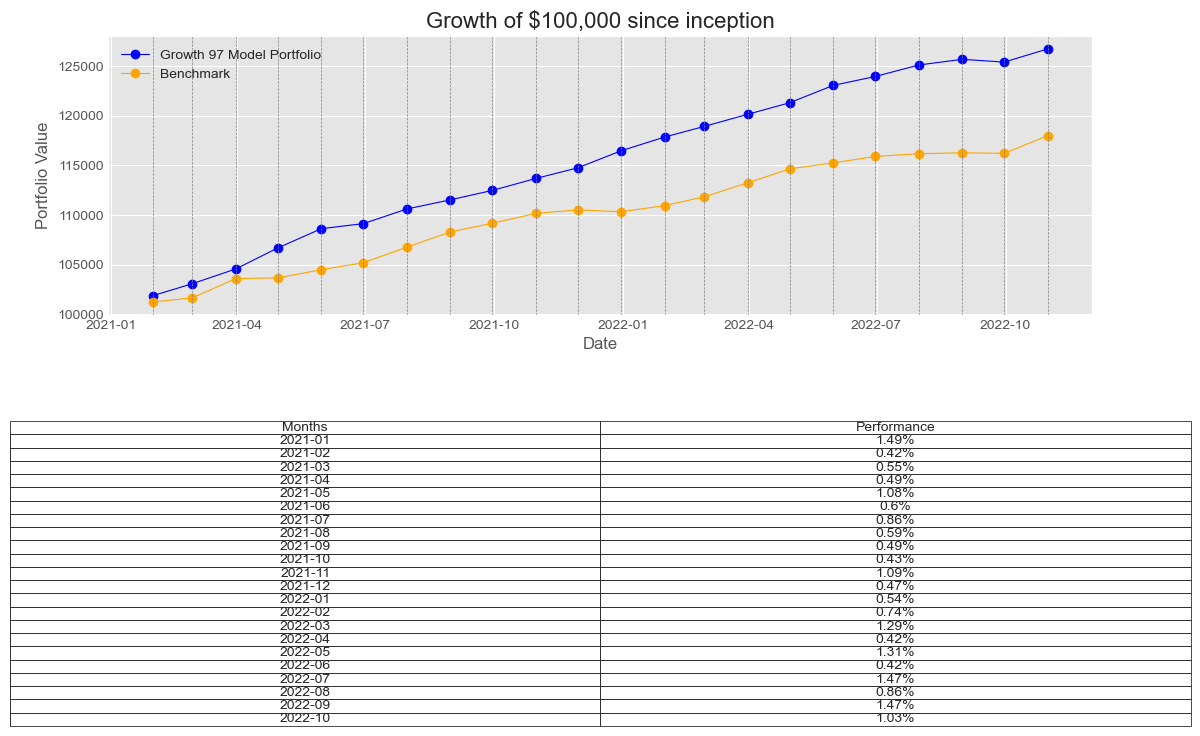

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

# Data generation
np.random.seed(0)
dates = pd.date_range(start="2021-01-01", periods=22, freq='M')
portfolio_performance = 100000 * (1 + np.random.normal(0.01, 0.005, len(dates)).cumsum())
benchmark_performance = 100000 * (1 + np.random.normal(0.008, 0.005, len(dates)).cumsum())

df = pd.DataFrame({
    'Date': dates,
    'Growth 97 Model Portfolio': portfolio_performance,
    'Benchmark': benchmark_performance
})

# Plotting
plt.style.use('ggplot')
fig = plt.figure(tight_layout=True, figsize=(12, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

ax1 = fig.add_subplot(gs[0])
ax1.plot(df['Date'], df['Growth 97 Model Portfolio'], label='Growth 97 Model Portfolio', color='blue', marker='o', linewidth=0.8)
ax1.plot(df['Date'], df['Benchmark'], label='Benchmark', color='orange', marker='o', linewidth=0.8)
ax1.set_title('Growth of $100,000 since inception', fontsize=16)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Portfolio Value', fontsize=12)
ax1.legend()

# Adding monthly vertical lines
for date in dates:
    ax1.axvline(x=date, color='gray', linestyle='--', linewidth=0.5)

# Generating monthly performance data
monthly_performance = np.random.uniform(0.3, 1.5, 22).round(2)
performance_data = {
    'Months': dates.strftime('%Y-%m'),
    'Performance': [f"{p}%" for p in monthly_performance]
}

performance_df = pd.DataFrame(performance_data)

ax2 = fig.add_subplot(gs[1])
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=performance_df.values, colLabels=performance_df.columns, rowLabels=['']*22, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Display the plot
plt.show()


In [9]:
# Data generation
np.random.seed(0)
dates = pd.date_range(start="2021-01-01", periods=22, freq='M')
portfolio_performance = 100000 * (1 + np.random.normal(0.01, 0.005, len(dates)).cumsum())
benchmark_performance = 100000 * (1 + np.random.normal(0.008, 0.005, len(dates)).cumsum())

df = pd.DataFrame({
    'Date': dates,
    'Growth 97 Model Portfolio': portfolio_performance,
    'Benchmark': benchmark_performance
})

In [10]:
df

,Date,Growth 97 Model Portfolio,Benchmark
0,2021-01-31,101882.026173,101232.218099
1,2021-02-28,103082.104777,101661.135589
2,2021-03-31,104571.473769,103596.012901
3,2021-04-30,106691.920369,103668.830064
4,2021-05-31,108625.699364,104491.709323
5,2021-06-30,109137.060424,105198.117398
6,2021-07-31,110612.104633,106764.507005
7,2021-08-31,111536.426029,108299.186390
8,2021-09-30,112484.816603,109176.660103
9,2021-10-31,113690.115854,110165.741362
